/home/vagrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


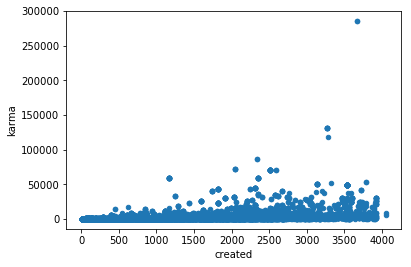

In [19]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

data = pd.read_json('users.json')
#pd = json_normalize(data, meta=['karma', 'created'])
#for item in pd :
#    if item["created"] and item["karma"]: 
#        df.append( [ item["created"],  item["karma"]])
df = data[['created','karma']]
today = pd.to_datetime('today')
df['created'] = (today - pd.to_datetime(df['created'], unit='s')).dt.days #converting unix time to human readable format and counting how many days passed til today
### create the plot 
df.plot.scatter(x=0,y=1)




In [20]:
import numpy as np
size = data.size
df = df[pd.notnull(df['created'])]
from sklearn.model_selection import train_test_split
xs = df["karma"].values.reshape(-1, 1)
ys = df["created"].values.reshape(-1, 1)
x, x_t, y, y_t = train_test_split(xs, ys, test_size=0.20, random_state=6)
#spilt the data to train and test in a 80:20 ratio
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x,y)

116362801.14344737

In [22]:
model.score(x,y)

0.11806988752319481

In [23]:
model.coef_

array([[ 0.03357052]])

In [24]:
model.intercept_

array([ 1339.44645268])

In [27]:
#predict 

predictions = model.predict(x_t)
res = model.predict(1000)

print( res )


[[ 1373.01696977]]


In [28]:
model.score(x,y)

0.11806988752319481

In [29]:
model.score(x_t, y_t)

0.16428103216819323

We can se that the model is very well trained as expected from the plot that 
appear to have a perfectly linear shape. 

## Part 2

Now we can calculate the  mean absolute error
for both train data and test data

In [264]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(x,y)


3497.3212692117004

In [265]:

mean_absolute_error(x_t,y_t)

3455.1022342586325

The results are different because the values we feed to the
method are different and not the same volume. The result is approximately the same
that means the data have uniformly scattered values.  

##### but in case we had to choose we would get the one from the actual train data as the more the sumples the more accurate results

## Part 3

In [266]:
from sklearn.metrics import mean_squared_error

mean_squared_error(x,y)

116362801.14344737

In [267]:
mean_squared_error(x_t,y_t)

130716733.56804334

### Part 4

In [30]:
# Pearsons r
# Pearson r tells us how good our model perform where 1 is the max and 0 is the min value.
# Pearsons r calculated score  - for the training data
model.score(x_t, y_t)
# Pearsons r calculated score  - for the test data

model.score(x_t, y_t)

0.16428103216819323